# 必要に応じてインストール

In [1]:
!pip install xmltodict

# 情報を集めるための関数

In [11]:

from collections import defaultdict
import urllib.parse
import pandas as pd
import requests
import xmltodict

#クエリ
def encode_word(word):
  #検索語をエンコードする関数
  return urllib.parse.quote(word)

def get_article_info(target_word, start_year):

  '''
  argment
  target_word(str):the word you want to search for
  start_year(int):the oldest year of publication

  return
  df_all(DataFrame): including author_name, title, publishing_organization, publication_year(sorted by publication_year)


  '''

  query = encode_word(target_word)

  #範囲
  start = 1
  end = 1000000000 #十分大きな値
  step = 1000
  start_lists = [num for num in range(start, end+1, step)]
  df_list = []
  interate = 0

  for page in start_lists:
    interate += 1
    print(f"{interate}回目")
    res = requests.get(f"http://api.jstage.jst.go.jp/searchapi/do?service=3&text={query}&pubyearfrom={start_year}&start={page}&count=1000")
    # service=3で検索
    # text="クエリ(urlのエンコード)"

    xml_dict = xmltodict.parse(res.content)
    data_dict = defaultdict(list) # 空のリストをつくる
    try:
      for article in xml_dict['feed']['entry']:
            if not article['author']['ja']: # 著者名がない場合を想定
                data_dict['name'].append(None)
            else:
                data_dict['name'].append(article['author']['ja']['name'])
            data_dict['article_title'].append(article['article_title']['ja'])
            data_dict['material_title'].append(article['material_title']['ja'])
            data_dict['pubyear'].append(article['pubyear'])

    except:
        break


    df = pd.DataFrame.from_dict(data_dict)
    df_list.append(df)
    df_all = pd.concat(df_list)
    df_all = df_all.sort_values('pubyear').reset_index(drop=True)

    return df_all



## 例

In [12]:
df = get_article_info("原子力", 1980)
print(df)

1回目
                     name                                      article_title  \
0                    槌田 敦                               原子力廃絶, 石炭縮小こそ岡本氏への回答   
1                    安本 正                     放射線事故の緊急医療救護に関する欧米諸国の実状とわが国の課題   
2          [清水 昭郎, 平松 伸章]  一次と二次の調和あるドッキングシステム : 日本原子力研究所の場合(&lt;シリーズ&gt;...   
3                   安藤 良夫                               品質保証に関するIAEA安全基準について   
4                    谷 昌博          JISに付標されたUDCについて : 第10回ドクメンテーション・シンポジウム概要   
..                    ...                                                ...   
995  [荒川 正頼, 久武 昌人, 山崎 晃]                            エネルギー分野における政策過程の二層構造の分析   
996                 寿楽 浩太                              本会会員は原子力のリスクの「破局性」を語れ   
997                 宮永 崇史                            講義を通して学生と考える原子力と核燃料サイクル   
998                 鈴木 茂和                      福島高専における福島第一廃炉に関する人材育成とロボット開発   
999                  乾 康代                                 日本の原発開発における都市計画と思想   

     material_title pubyear  
0    

# 可視化

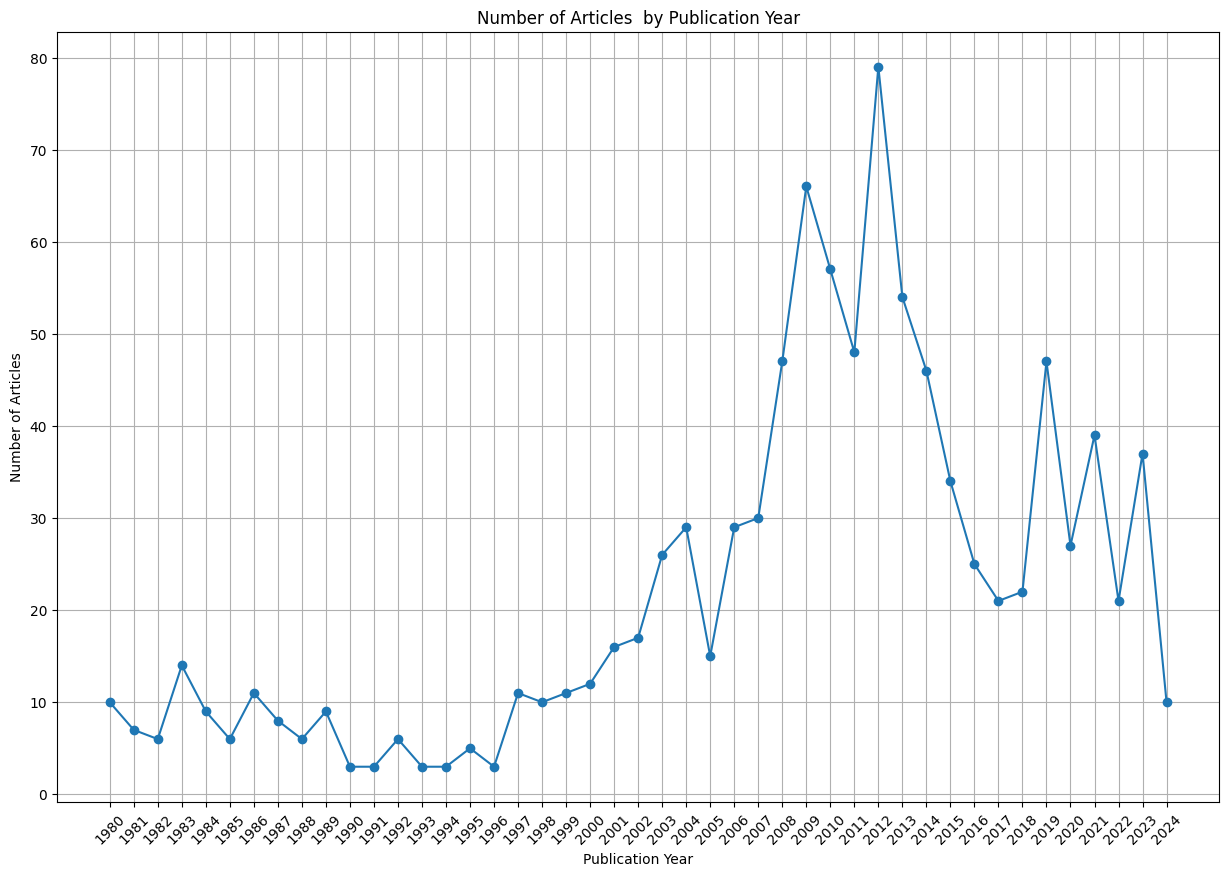

In [14]:
import matplotlib.pyplot as plt

# pubyearごとのarticle_titleのカウント
count_by_pubyear = df[["article_title", "pubyear"]].groupby('pubyear').count()

# プロットのための準備
plt.figure(figsize=(15, 10))
plt.plot(count_by_pubyear.index, count_by_pubyear['article_title'], marker='o', linestyle='-')

# プロットの設定
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.title('Number of Articles  by Publication Year')
plt.grid(True)

# x軸のラベルを45度傾ける
plt.xticks(rotation=45)
# グラフの表示
plt.show()


# 発行数を降順で見てみる

In [15]:
df["material_title"].value_counts().head(50)

,count
material_title,
日本原子力学会誌ATOMOΣ,511
日本原子力学会誌,143
日本原子力学会 年会・大会予稿集,57
日本物理学会誌,31
電氣學會雜誌,23
電気学会誌,22
電気学会論文誌Ｂ（電力・エネルギー部門誌）,17
コンクリート工学,16
生活協同組合研究,10
